# **Predict the likehood of customer churning**
#### Project Overview: Since it's much more expensive to acquire new customers than to retain current customers, market researchers want to know beforehand the likehood of a customer stopping subscription to the company's service. 
#### Customer churn: This marketing term refers to the percentage of customers who stopped purchasing your business's products or services during a certain period of time.
#### **Highlight of this project**: Treatment of **False Negative** issue (the model predicted that the customer would not churn, but the customer in fact churned)
Original dataset can be accessed at https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download


## **1. Data + Library loading & Preliminary inspection**

In [1]:
#%%capture
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import the dataset
df = pd.read_csv('telco.csv')

# view the dataset's shape
print("The dataset contains {} rows of customers records, and {} columns/variables".format(df.shape[0], df.shape[1]))

The dataset contains 7043 rows of customers records, and 21 columns/variables


In [4]:
# check unique values of each column
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

In [5]:
# inspect whether class imbalance exists
print("Among all {} available records, there are {} customers who churned last month and {} customers who didn't churn last month".format(df.shape[0], df[df['Churn']=='Yes'].shape[0], df[df['Churn']=='No'].shape[0]))

Among all 7043 available records, there are 1869 customers who churned last month and 5174 customers who didn't churn last month


In [6]:
# drop the obviously-useless column id
df = df.drop(columns='customerID')
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


As shown above, the data set contains 19 independent variables, which can be classified into 3 groups:

 **(1) Demographic Information**

gender: Whether the client is a female or a male (Female, Male).

SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).

Partner: Whether the client has a partner or not (Yes, No).

Dependents: Whether the client has dependents or not (Yes, No).

 **(2) Customer Account Information**

tenure: Number of months the customer has stayed with the company (Multiple different numeric values).

Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).

PaperlessBilling: Whether the client has paperless billing or not (Yes, No).

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).

MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).

TotalCharges: The total amount charged to the customer (Multiple different numeric values).

**(3) Services Information**

PhoneService: Whether the client has a phone service or not (Yes, No).

MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes).

InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)

OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes).

OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes).

DeviceProtection: Whether the client has device protection or not (No internet service, No, Yes).

TechSupport: Whether the client has tech support or not (No internet service, No, Yes).

StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes).

StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes)

## **2. EDA**

In [7]:
# check for nulls
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
# transform the column TotalCharges into a numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
print(df.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [12]:
# now that we can see TotalCharges contains 11 nulls
df_temp = df[df['TotalCharges'].isnull()]
df_temp[df_temp['tenure']==0].shape[0]

11

All the 11 records where *TotalCharges* having NaN values have *tenure* = 0 (*tenure* = Number of months the customer has stayed with the company).
Therefore, we believe these records are incorrect and need to be removed. 

In [13]:
df = df[df['TotalCharges'].notna()]
print("After removing the false records, the current dataset contains {} rows of customer records".format(df.shape[0]))

After removing the false records, the current dataset contains 7032 rows of customer records


In [14]:
# view the statistics of all continuous variables
df_numeric = df[['tenure','MonthlyCharges','TotalCharges']]
print(df_numeric.describe())

            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000


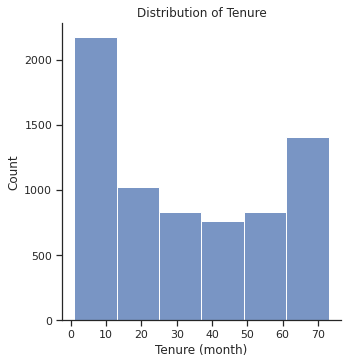

In [ ]:
sns.set_theme(style="ticks")
fig = sns.displot(df_numeric[['tenure']], x="tenure", binwidth=12)
plt.xlabel("Tenure (month)")
plt.title("Distribution of Tenure")
plt.show(fig)

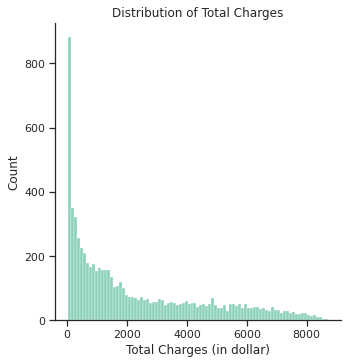

In [ ]:
sns.set_theme(style="ticks", palette='Set2')
fig = sns.displot(df_numeric[['TotalCharges']], x="TotalCharges", binwidth=100)
plt.xlabel("Total Charges (in dollar)")
plt.title("Distribution of Total Charges")
plt.show(fig)

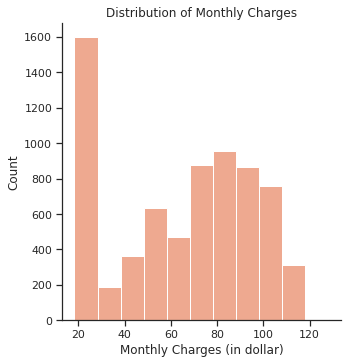

In [ ]:
sns.set_theme(style="ticks", palette='flare')
fig = sns.displot(df_numeric[['MonthlyCharges']], x="MonthlyCharges", binwidth=10)
plt.xlabel("Monthly Charges (in dollar)")
plt.title("Distribution of Monthly Charges")
plt.show(fig)

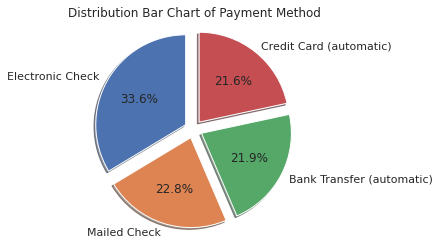

In [ ]:
df['PaymentMethod'].value_counts()
labels = ['Electronic Check', 'Mailed Check', 'Bank Transfer (automatic)', 'Credit Card (automatic)']
sizes = [2365, 1604, 1542, 1521]
explode = (0.1, 0.1, 0.1, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title("Distribution Bar Chart of Payment Method")
plt.show()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


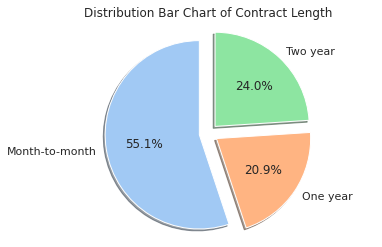

In [ ]:
print(df['Contract'].value_counts())
labels = ['Month-to-month', 'One year', 'Two year']
sizes = [3875, 1472, 1685]
explode = (0.1, 0.1, 0.1)  
fig1, ax1 = plt.subplots()
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal') 
plt.title("Distribution Bar Chart of Contract Length")
plt.show()

## **3. Feature Engineering**

### Encode Categorical Variables 
Since the categorical variables do not convey hierarchical information, we choose one-hot encoding over labelEncoder. 

In [15]:
df.head(2)
sample=df.head(2)

In [16]:
from sklearn.preprocessing import OneHotEncoder
df_encoded = pd.get_dummies(df, columns = ['gender', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])

## **4. Modeling**

In [17]:
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [18]:
# build the training set
X = df_encoded[df_encoded.loc[:, df_encoded.columns!='Churn'].columns]
Y = df_encoded['Churn']
     
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1)
print("The training dataset contains {} columns and {} rows.".format(X_train.shape[1], X_train.shape[0]))

The training dataset contains 45 columns and 6328 rows.


### 4.0 Simple baseline


In [23]:
base_pcnt = len(Y_train[Y_train=='No']) / Y_train.shape[0] * 100
print("The distribution in the train dataset is biased: {:.2f}% are False (did not churn).\nTherefore, for our machine learning model to be useful, its accuracy needs to be higher than this value.".format(base_pcnt))

The distribution in the train dataset is biased: 73.29% are False (did not churn).
Therefore, for our machine learning model to be useful, its accuracy needs to be higher than this value.


### 4.1 Logistic Regression

Add gridserachCV

Add StandardScaler

In [20]:
from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model
lr_clf = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.7, max_iter=100000).fit(X_train, Y_train)

print("The training accuracy is {}".format(lr_clf.score(X_train, Y_train)))

The training accuracy is 0.7877686472819216


Confusion Matrix



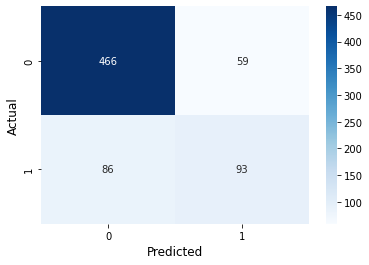


Macro-averaged: all classes equally contribute to the final averaged metric. 
Weighted-averaged: each classes's contribution to the average is weighted by its size.

Classification Metrics

              precision    recall  f1-score   support

          No       0.84      0.89      0.87       525
         Yes       0.61      0.52      0.56       179

    accuracy                           0.79       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.79      0.79      0.79       704



In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = lr_clf.predict(X_test)

# Calculate and plot confusion matrix
cf_matrix = confusion_matrix(Y_test, y_pred)

print("Confusion Matrix\n")
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual',fontsize=12)
plt.show()

# Report classification metrics
lr_report = classification_report(Y_test, y_pred)

print("\nMacro-averaged: all classes equally contribute to the final averaged metric. \nWeighted-averaged: each classes's contribution to the average is weighted by its size.")
print("\nClassification Metrics\n")
print(lr_report)

#### 4.1.1 Logistic Regression with Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

# Apply standardization
ss = StandardScaler().fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [29]:
lr_ss = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.7, max_iter=100000).fit(X_train_ss, Y_train)

print("The training accuracy is {}".format(lr_clf.score(X_train_ss, Y_train)))

The training accuracy is 0.7003792667509482


Confusion Matrix



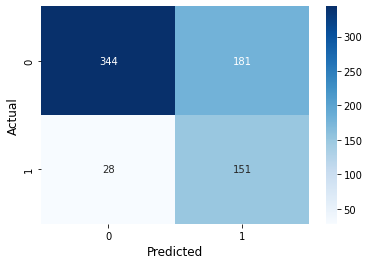


Classification Metrics

              precision    recall  f1-score   support

          No       0.92      0.66      0.77       525
         Yes       0.45      0.84      0.59       179

    accuracy                           0.70       704
   macro avg       0.69      0.75      0.68       704
weighted avg       0.81      0.70      0.72       704



In [26]:
y_pred_ss = lr_clf.predict(X_test_ss)

# Calculate and plot confusion matrix
cf_matrix = confusion_matrix(Y_test, y_pred_ss)

print("Confusion Matrix\n")
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual',fontsize=12)
plt.show()

# Report classification metrics
lr_report_ss = classification_report(Y_test, y_pred_ss)

print("\nClassification Metrics\n")
print(lr_report_ss)

#### 4.1.2 Logistic Regression with PCA

Explained variances in percentage:
[ 25.24655293  38.86786167  48.29281587  53.93114883  58.91022868
  63.35450256  67.0784524   70.52596559  73.54167842  76.4270465
  79.2501282   81.92066228  84.50431579  87.01935569  89.37320572
  91.53945905  93.57596003  95.5168756   97.35716575  99.05548916
  99.86771823  99.99786781 100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.        ]



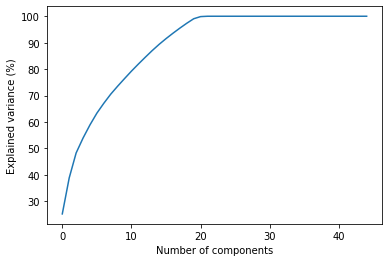

In [30]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA().fit(X_train_ss)
x_train_pca = pca.transform(X_train_ss)
x_test_pca = pca.transform(X_test_ss)

#Print explained variances in percentage
print("Explained variances in percentage:")
print(np.cumsum(pca.explained_variance_ratio_*100))
print()

# Plot cumulative explained
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.show()

In [31]:
# Rerun PCA with 20 components
pca = PCA(n_components=20).fit(X_train_ss)
x_train_pca = pca.transform(X_train_ss)
x_test_pca = pca.transform(X_test_ss)

In [32]:
# Fit a logistic regression model
lr_clf_pca = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.7, max_iter=100000).fit(x_train_pca, Y_train)

print("The training accuracy is {}".format(lr_clf_pca.score(x_train_pca, Y_train)))

The training accuracy is 0.8038874841972187


Confusion Matrix



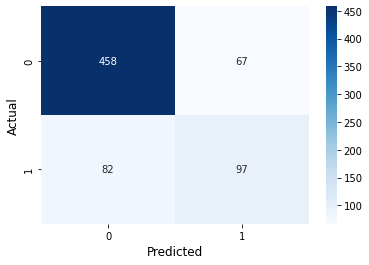


Classification Metrics

              precision    recall  f1-score   support

          No       0.85      0.87      0.86       525
         Yes       0.59      0.54      0.57       179

    accuracy                           0.79       704
   macro avg       0.72      0.71      0.71       704
weighted avg       0.78      0.79      0.79       704



In [33]:
y_pred_pca = lr_clf_pca.predict(x_test_pca)

# Calculate and plot confusion matrix
cf_matrix = confusion_matrix(Y_test, y_pred_pca)

print("Confusion Matrix\n")
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual',fontsize=12)
plt.show()

# Report classification metrics
lr_pca_report = classification_report(Y_test, y_pred_pca)

print("\nClassification Metrics\n")
print(lr_pca_report)

After using PCA, the accuracy score didn't improve much. Also, we notice that the model did poorly on false negative rate (the model often predicted a customer would not churn, but the customer in fact churned). 

#### 4.2 Artificial Neural Network
(the hypothesis is that NN would NOT work well since the dataset is relatively small)

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define parameters and use grid search cross validation to find 
# the best set of paramter for artificial nueral network
params = {
    "hidden_layer_sizes": [(64, 32, 16), (128, 64, 32), (256, 128, 64)],
    "activation": ["logistic", "tanh", "relu"]
}
mlp_gs = GridSearchCV(estimator=MLPClassifier(max_iter=10000), param_grid=params, n_jobs=-1, cv=3).fit(X_train_ss, Y_train)

print("The best parameters are {}".format(mlp_gs.best_params_))
print("The training accuracy of the best parameters is {}".format(mlp_gs.best_score_))

The best parameters are {'activation': 'logistic', 'hidden_layer_sizes': (256, 128, 64)}
The training accuracy of the best parameters is 0.7866598951158692


Confusion Matrix



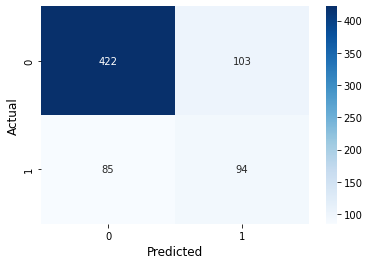


Classification Metrics

              precision    recall  f1-score   support

          No       0.83      0.80      0.82       525
         Yes       0.48      0.53      0.50       179

    accuracy                           0.73       704
   macro avg       0.65      0.66      0.66       704
weighted avg       0.74      0.73      0.74       704



In [39]:
from sklearn.metrics import classification_report

y_pred = mlp_gs.best_estimator_.predict(X_test_ss)

# Calculate and plot confusion matrix
mlp_matrix = confusion_matrix(Y_test, y_pred)

print("Confusion Matrix\n")
sns.heatmap(mlp_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual',fontsize=12)
plt.show()

# Report classification metrics
mlp_report = classification_report(Y_test, y_pred)

print("\nClassification Metrics\n")
print(mlp_report)

#### 4.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameters and use grid search cross validation to find 
# the best set of paramter for random forest classifier
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [80, 160, 320]
}
rf_gs = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, n_jobs=-1, cv=3).fit(X_train, Y_train)

print("The best parameters are {}".format(rf_gs.best_params_))
print("The training accuracy of the best parameters is {}".format(rf_gs.best_score_))

The best parameters are {'max_depth': 160, 'n_estimators': 200}
The training accuracy of the best parameters is 0.7893506127729126


Confusion Matrix



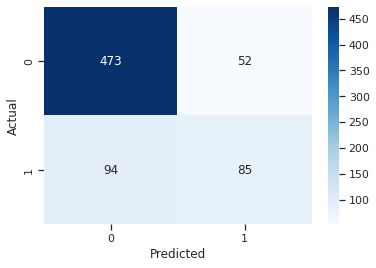


Classification Metrics

              precision    recall  f1-score   support

          No       0.83      0.90      0.87       525
         Yes       0.62      0.47      0.54       179

    accuracy                           0.79       704
   macro avg       0.73      0.69      0.70       704
weighted avg       0.78      0.79      0.78       704



In [ ]:
from sklearn.metrics import classification_report

y_pred = rf_gs.best_estimator_.predict(X_test)

# Calculate and plot confusion matrix
rf_matrix = confusion_matrix(Y_test, y_pred)

print("Confusion Matrix\n")
sns.heatmap(rf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual',fontsize=12)
plt.show()

# Report classification metrics
rf_report = classification_report(Y_test, y_pred)

print("\nClassification Metrics\n")
print(rf_report)

#### 4.4 XG Boost

In [36]:
## WITHOUT GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, Y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
print("The test accuracy is {}".format(accuracy_score(Y_test, preds)))

The test accuracy is 0.7954545454545454


Confusion Matrix



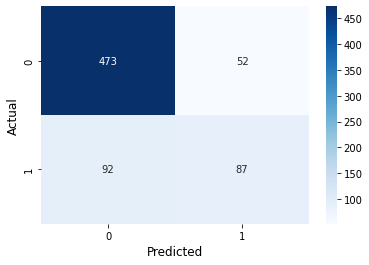


Classification Metrics

              precision    recall  f1-score   support

          No       0.84      0.90      0.87       525
         Yes       0.63      0.49      0.55       179

    accuracy                           0.80       704
   macro avg       0.73      0.69      0.71       704
weighted avg       0.78      0.80      0.79       704



In [37]:
# Calculate and plot confusion matrix
xgb_matrix = confusion_matrix(Y_test, preds)

print("Confusion Matrix\n")
sns.heatmap(xgb_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual',fontsize=12)
plt.show()

# Report classification metrics
xgb_report = classification_report(Y_test, preds)

print("\nClassification Metrics\n")
print(xgb_report)

In [40]:
## WITH GridSearchCV
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
xgb_fit = grid_cv.fit(X_train, Y_train)

# best score
print("The training accuracy of the best parameters is {}".format(grid_cv.best_score_))

The training accuracy of the best parameters is 0.8494671861534804


Confusion Matrix



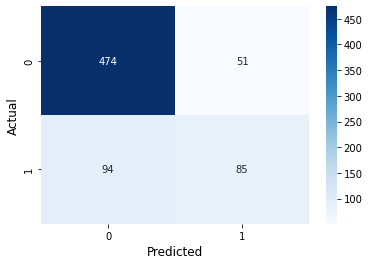


Classification Metrics

              precision    recall  f1-score   support

          No       0.83      0.90      0.87       525
         Yes       0.62      0.47      0.54       179

    accuracy                           0.79       704
   macro avg       0.73      0.69      0.70       704
weighted avg       0.78      0.79      0.78       704



In [41]:
y_pred = grid_cv.best_estimator_.predict(X_test)

# Calculate and plot confusion matrix
xgb2_matrix = confusion_matrix(Y_test, y_pred)

print("Confusion Matrix\n")
sns.heatmap(xgb2_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual',fontsize=12)
plt.show()

# Report classification metrics
xgb2_report = classification_report(Y_test, y_pred)

print("\nClassification Metrics\n")
print(xgb2_report)

## **5. Discussion**
As both bagging and boosting have been utilized in this project to improve model accuracy, which ensemble method is more helpful?
